In [7]:
#https://towardsdatascience.com/is-your-model-overfitting-or-maybe-underfitting-an-example-using-a-neural-network-in-python-4faf155398d2
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
%matplotlib inline

In [8]:
iris = load_iris()
X, y = iris.data, iris.target

In [9]:
kf = KFold(n_splits=20)
list_training_error = []
list_testing_error = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = MLPRegressor()
    model.fit(X_train, y_train)
    y_train_data_pred   = model.predict(X_train)
    y_test_data_pred    = model.predict(X_test)
    fold_training_error = mean_absolute_error(y_train, y_train_data_pred) 
    fold_testing_error  = mean_absolute_error(y_test, y_test_data_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)

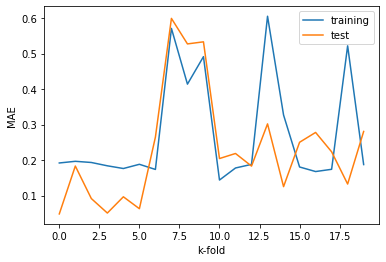

In [12]:
plt.plot(np.arange(len(list_training_error)),list_training_error,label='training')
plt.plot(np.arange(len(list_testing_error)),list_testing_error,label='test')
plt.xlabel('k-fold')
plt.ylabel('MAE')
plt.legend()
